# Importing Lib

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [123]:
df=pd.read_csv('Student_Performance.csv')
print(df.info())
display(df.head())
display(df.tail())
display(df.describe())
display(df.describe(include='object'))

TARGET='Performance Index'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


# Checking for Empty or duplicate values

In [124]:
print(df.isna().sum()/len(df))
print(f'\nThere is {df.duplicated().sum()} duplicated rows')
df.drop_duplicates(inplace=True)
print(f'\nThere is {df.duplicated().sum()} duplicated rows')

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

There is 127 duplicated rows

There is 0 duplicated rows


# Visualizing some distribution

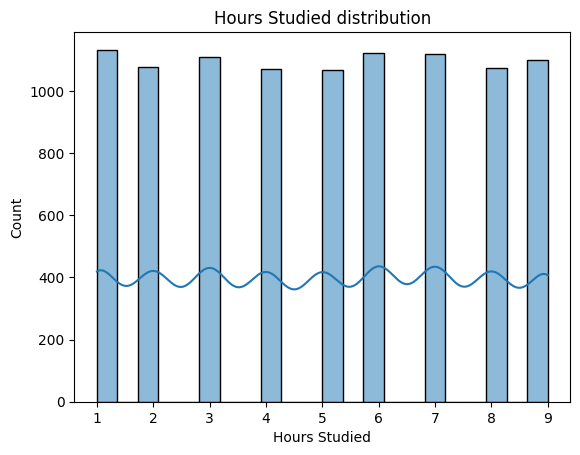

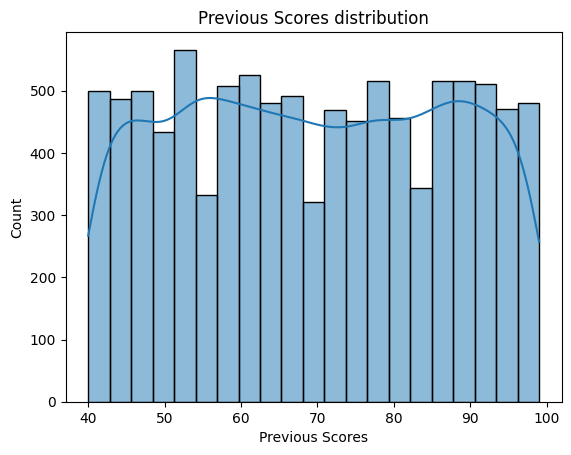

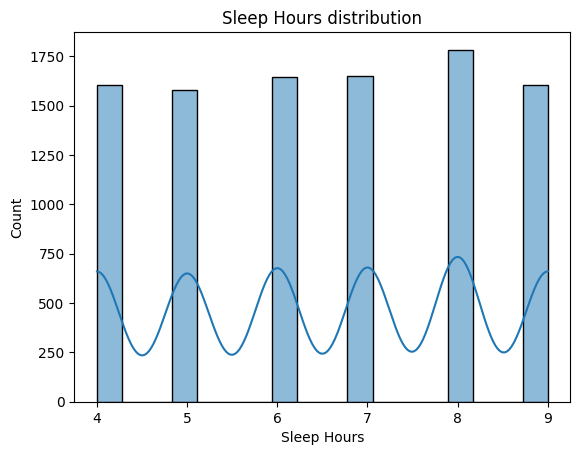

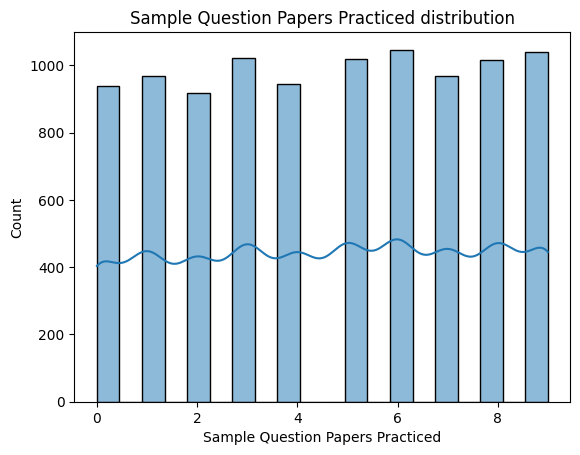

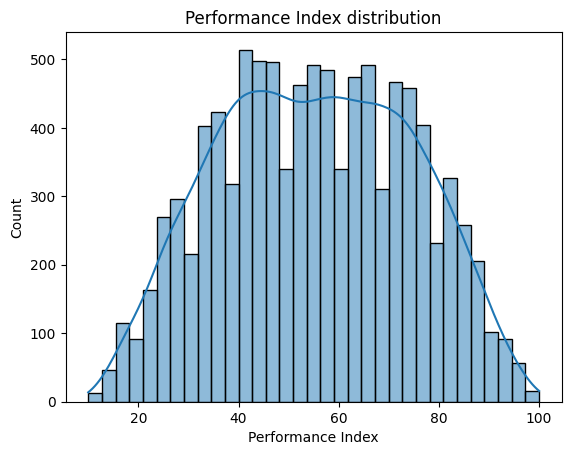

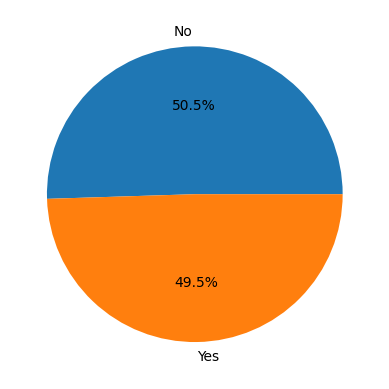

In [ ]:
for c in df.select_dtypes(exclude='object').columns:
    sns.histplot(data=df,x=c,kde=True)
    plt.title(f'{c} distribution')
    plt.show()
plt.pie(x=df['Extracurricular Activities'].value_counts(),labels=df['Extracurricular Activities'].value_counts().index,autopct="%1.1f%%")
plt.show()


# Correlation matrix

a statistical measure that describes the extent to which two or more variables change together

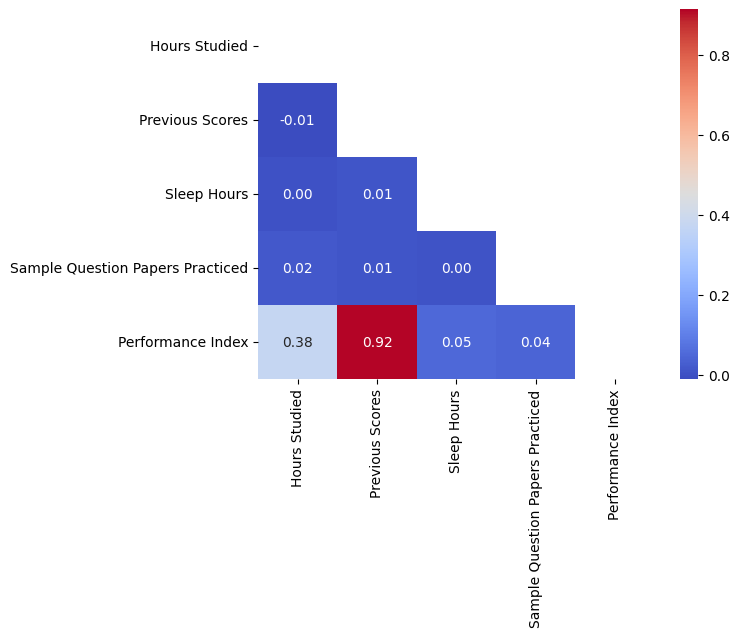

In [126]:
corr=df.select_dtypes(exclude='object').corr()
mask=np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(data=corr,mask=mask,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()


When we inspect the correlation matrix, we notice that ```Previous Scores``` has a very strong correlation of 0.92 with the target variable ```Performance Index```.


This makes it an excellent candidate to demonstrate simple linear regression (one input variable), because we can clearly observe a linear trend between these two variables

# Preprocessing

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
display(x)
display(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)

num_col=x.select_dtypes(exclude='object').columns
cat_col=x.select_dtypes(include='object').columns


ct=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_col),
        ('cat',OneHotEncoder(drop='first'),cat_col)
    ]
)

x_train_transfromed=ct.fit_transform(x_train)
x_test_transformed=ct.transform(x_test)

column_name=ct.get_feature_names_out()
for i in range(len(column_name)):
    column_name[i]=column_name[i][5:]

x_train=pd.DataFrame(x_train_transfromed,columns=column_name,index=x_train.index)
x_test=pd.DataFrame(x_test_transformed,columns=column_name,index=x_test.index)

display(x_train.head())
display(x_test.head())





,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
243,-0.380545,-0.418618,-1.501892,0.511244,1.0
8374,1.558087,-1.623681,1.453568,-0.185847,0.0
5581,1.170361,-0.877690,0.862476,-0.185847,0.0
9444,-1.155998,-0.074314,-0.910800,-0.185847,1.0
8600,-1.155998,0.499525,-0.910800,-0.534393,1.0


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
1514,-0.380545,0.327373,1.453568,0.859790,1.0
9342,0.782634,0.614293,1.453568,1.556881,1.0
1055,-1.543725,1.302901,-1.501892,0.511244,0.0
86,0.782634,0.327373,-0.319708,0.511244,0.0
2583,-0.768272,1.417669,-0.910800,0.511244,0.0


# Linear Regression

### Simple Linear Regression



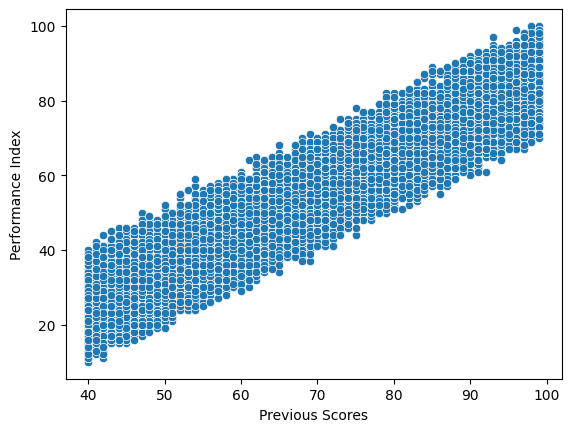

In [128]:
sns.scatterplot(data=df,x='Previous Scores',y=TARGET)
plt.show()

In [129]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train[['Previous Scores']],y_train)
print(f'{lr.coef_[0]:.2f}')
print(f'{lr.intercept_:.2f}')

17.63
55.03


### model tries to find a line of the form 


<div align='center'>
   <img src="1_PDbfu8RCLs8RisqKHyNiJA.png" height="240" width="500" alt="logo header"><br/>
</div>

### So The output msut be in that form

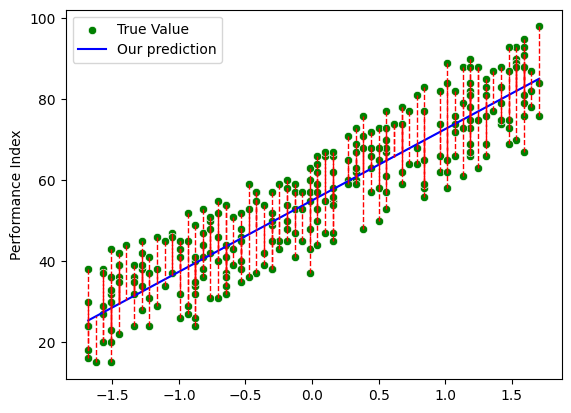

In [130]:
coef = lr.coef_.reshape(1, 1)
x_sample = x_test[['Previous Scores']].sample(frac=0.1, random_state=22)
y_sample = y_test.loc[x_sample.index]   

x_values = x_sample.to_numpy().flatten()
output = (x_values.reshape(-1,1) @ coef.T + lr.intercept_).flatten()


sns.scatterplot(x=x_values, y=y_sample, color='green', label='True Value')
sns.lineplot(x=x_values, y=output, color='blue', label='Our prediction')
for i in range(len(x_values)):
    plt.plot(
        [x_values[i],x_values[i]],
        [y_sample.iloc[i],output[i]],
        linestyle='--',
        linewidth=1,
        color='red'
    )
plt.legend()
plt.show()

## So how really the model train 

### The Model tries to find β1 and β0​ so the error is as small as possible across all data points.

## How The error (Loss function) computed

### Linear Regression use MSE (mean squared error) 

<div align='center'>
   <img src="download.png" height="240" width="500" alt="logo header"><br/>
</div>

IT penelize large errors mor than small ones o zide polynmial de deg 2 donc 3indha minimum wa7id o sehile bch deriviha()


{'Extracurricular Activities_Yes': 0.6219590560815875,
 'Hours Studied': 7.341165051349047,
 'Previous Scores': 17.756552899837082,
 'Sample Question Papers Practiced': 0.5411977049862351,
 'Sleep Hours': 0.8064939408211}


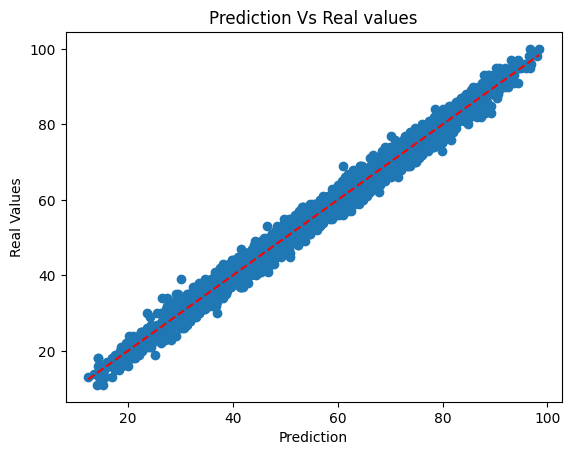

In [139]:
import pprint
lr_mult=LinearRegression()
lr.fit(x_train,y_train)
coef_dict=dict(zip(x_train.columns,lr.coef_.flatten().tolist()))
pprint.pprint(coef_dict)

pred=lr.predict(x_test)

plt.scatter(x=pred,y=y_test)
plt.title('Prediction Vs Real values')
plt.xlabel('Prediction')
plt.ylabel('Real Values')
plt.plot([pred.min(),pred.max()],[pred.min(),pred.max()],ls='--',color='red')
plt.show()
